In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import warnings
warnings.filterwarnings('ignore')


## Link to the dataset:
https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset?resource=download

## 1. Check all products available

In [40]:
df_products = pd.read_csv('Amazon-Products.csv')

In [41]:
df_products.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [42]:
len(df_products)

551585

## 2. Prepare dataset

In [43]:
# I think it is not that bad to leave the rows where rating is null, 
# however, empty values for price and discount price should be deleted

df_products.isnull().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [44]:
df_products.dropna(inplace=True)

In [45]:
df_products.isnull().sum()

Unnamed: 0        0
name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [46]:
# we need to type cast all the columns properly 
# (especially ratings, no_of_ratings, discount_price, actual_price)
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340680 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      340680 non-null  int64 
 1   name            340680 non-null  object
 2   main_category   340680 non-null  object
 3   sub_category    340680 non-null  object
 4   image           340680 non-null  object
 5   link            340680 non-null  object
 6   ratings         340680 non-null  object
 7   no_of_ratings   340680 non-null  object
 8   discount_price  340680 non-null  object
 9   actual_price    340680 non-null  object
dtypes: int64(1), object(9)
memory usage: 28.6+ MB


In [47]:
df_products['no_of_ratings'] = pd.to_numeric(df_products['no_of_ratings'].str.replace(',', '', regex=True), errors='coerce')
df_products['discount_price'] = pd.to_numeric(df_products['discount_price'].str.replace(r'[₹,]', '', regex=True), errors='coerce')
df_products['actual_price'] = pd.to_numeric(df_products['actual_price'].str.replace(r'[₹,]', '', regex=True), errors='coerce')
df_products['ratings'] = pd.to_numeric(df_products['ratings'], errors='coerce')

df_products.dropna(subset=['no_of_ratings', 'discount_price', 'actual_price', 'ratings'], inplace=True)

df_products.reset_index(drop=True, inplace=True)
df_products.head()


,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0


In [48]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334963 entries, 0 to 334962
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      334963 non-null  int64  
 1   name            334963 non-null  object 
 2   main_category   334963 non-null  object 
 3   sub_category    334963 non-null  object 
 4   image           334963 non-null  object 
 5   link            334963 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   334963 non-null  float64
 8   discount_price  334963 non-null  float64
 9   actual_price    334963 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 25.6+ MB


## 2.1. Add new features

In [88]:
df_products['discount'] = (df_products['actual_price'] - df_products['discount_price']) / df_products['actual_price'] * 100


In [89]:
df_products

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,44.060010
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,38.820897
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0,44.361994
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0,44.934048
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0,49.122289
...,...,...,...,...,...,...,...,...,...,...,...
334958,1098,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,https://m.media-amazon.com/images/I/61voQ68VuT...,https://www.amazon.in/Be-savage-Purple-Hoodie-...,4.6,6.0,711.0,999.0,28.828829
334959,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9.0,3449.0,4599.0,25.005436
334960,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2.0,1199.0,1999.0,40.020010
334961,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1.0,1199.0,1999.0,40.020010


## 3. Analysis

<Axes: xlabel='count', ylabel='main_category'>

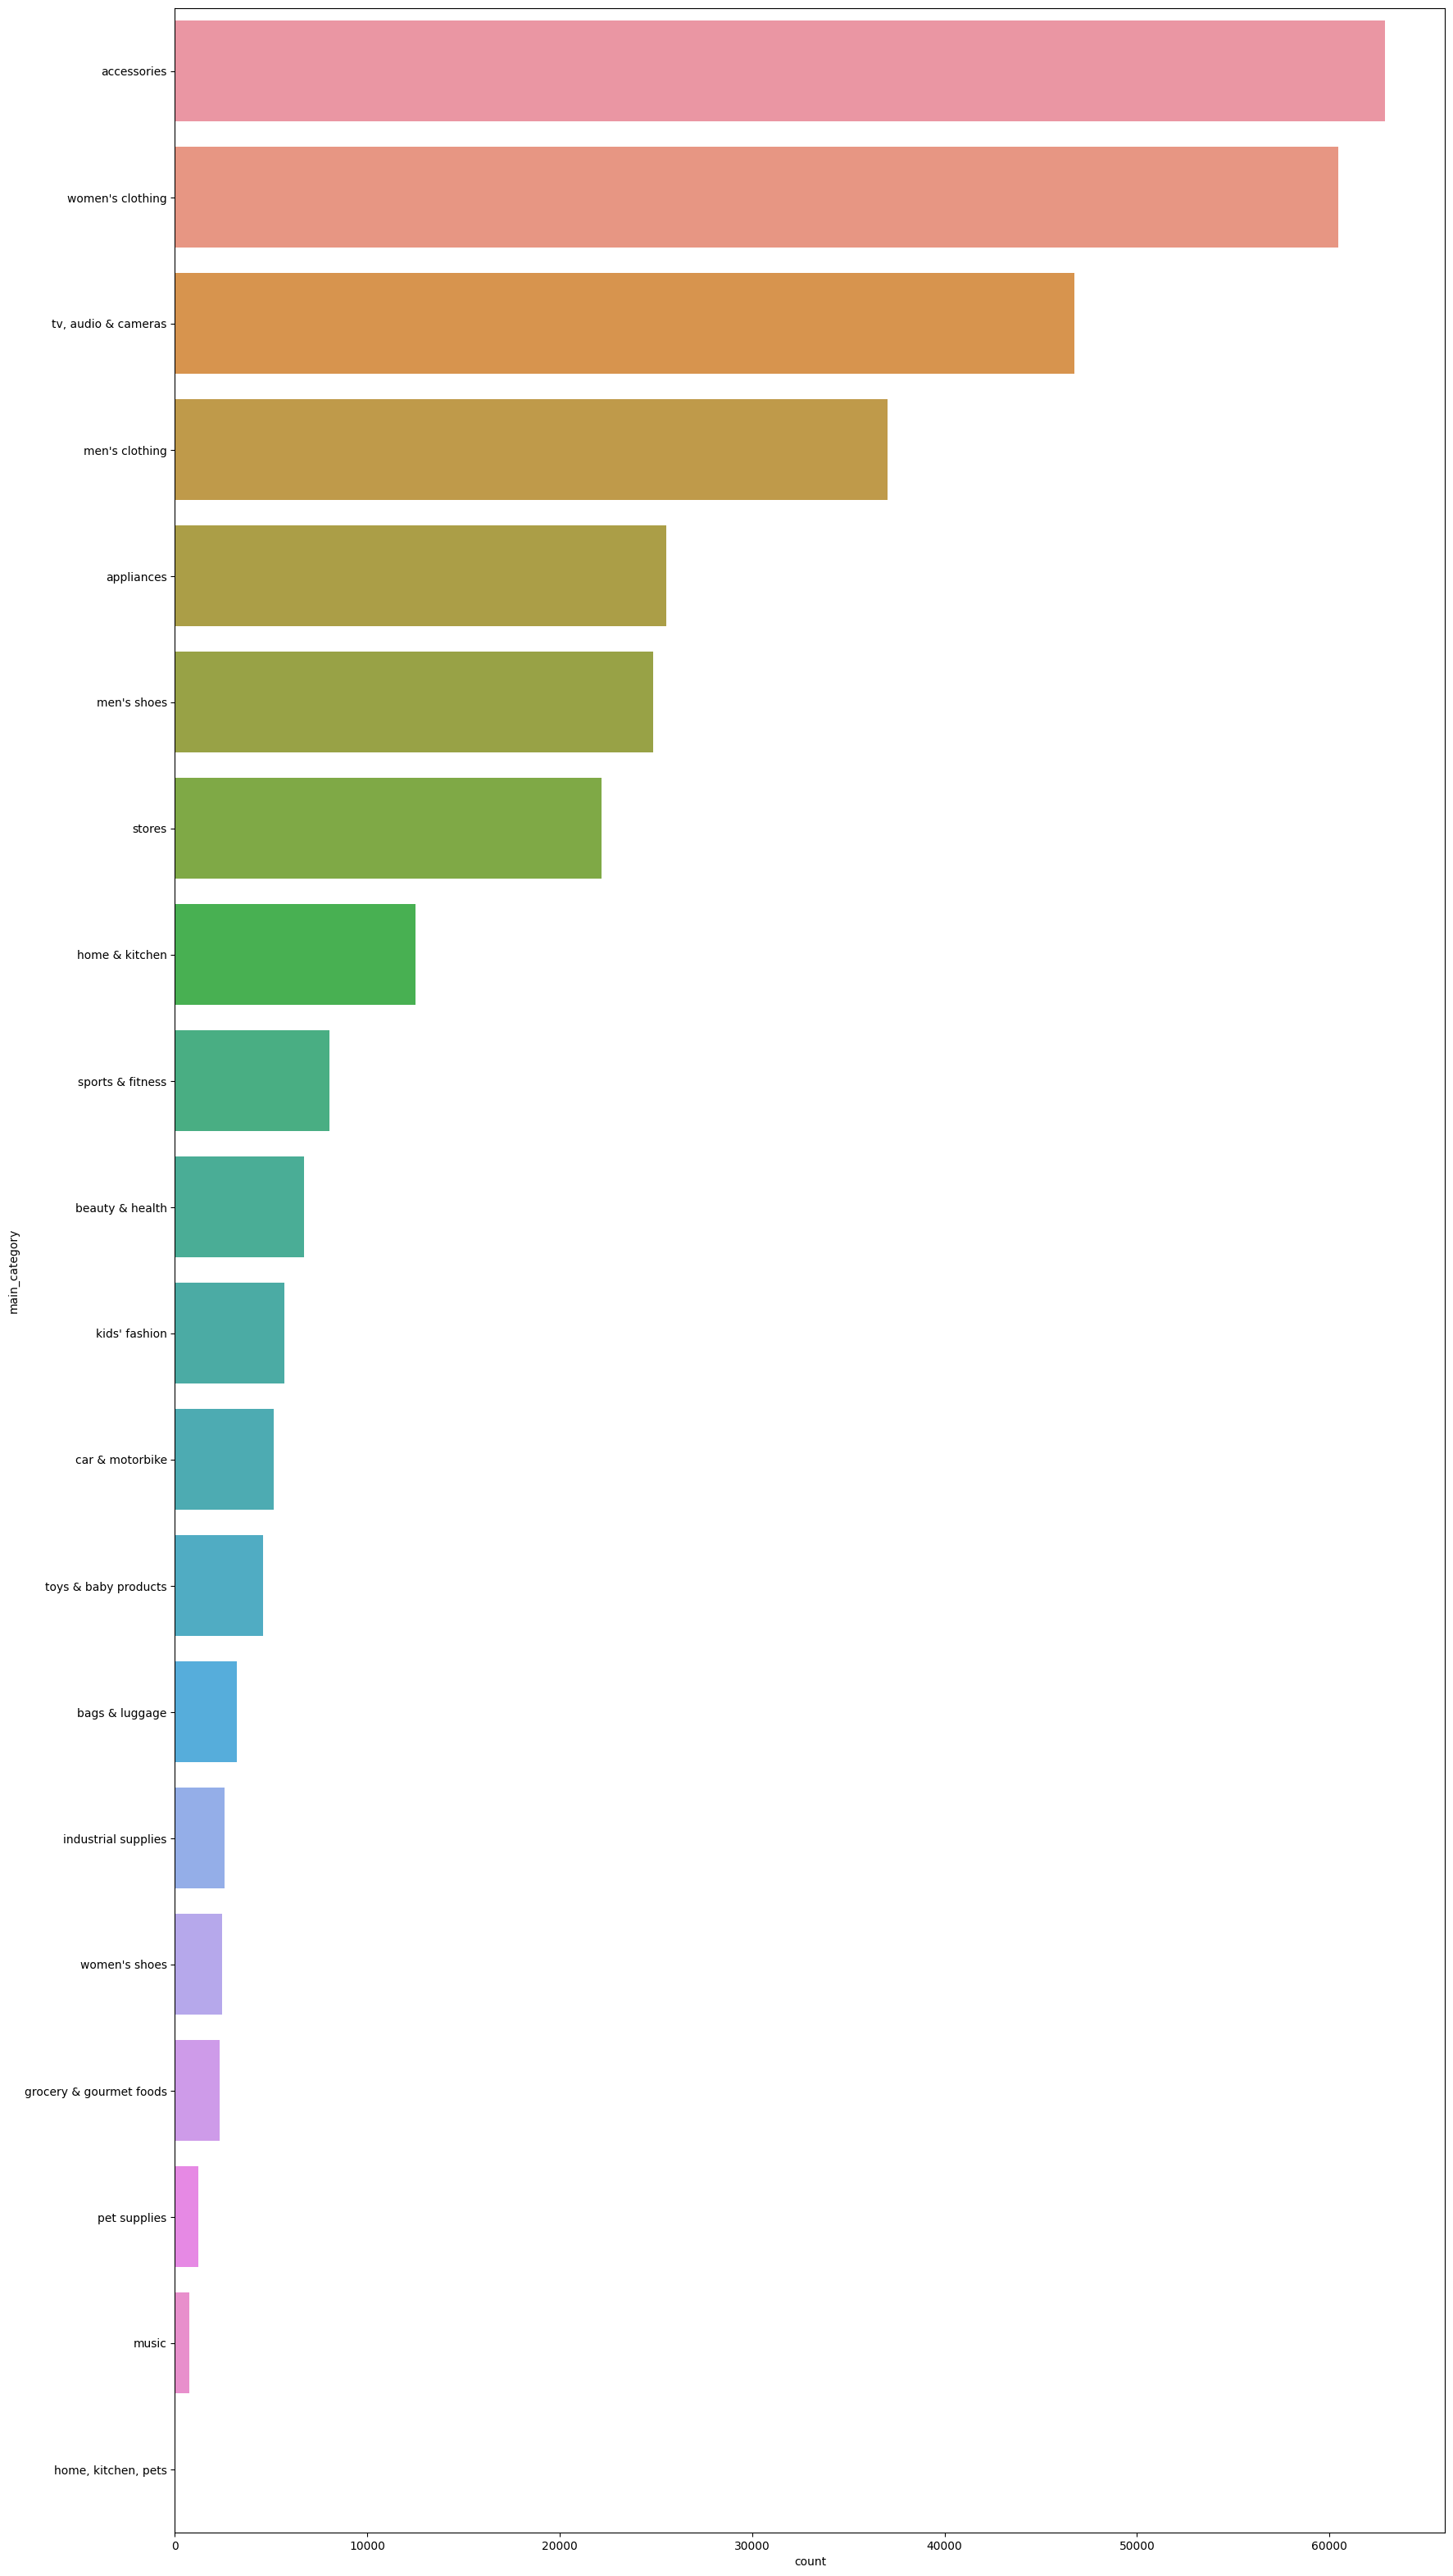

In [49]:
# here we can see the most amount of products available are accessories, women's clothing, and tv, audio & cameras 
# (the most diverse categories)

sorted_categories = df_products['main_category'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(20, 40))
sns.countplot(df_products, y='main_category', order=sorted_categories)

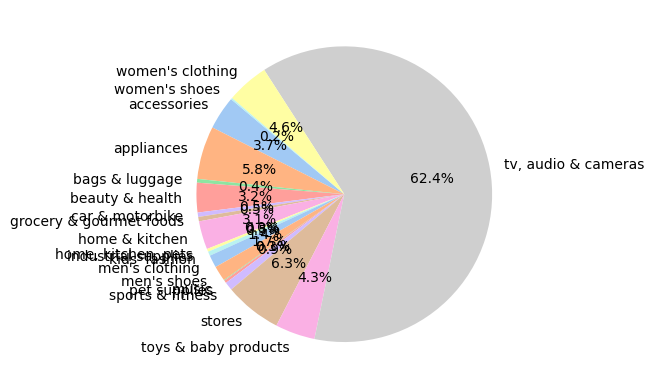

In [50]:
# we can see that the most number of ratings given by users are for tv, audio & cameras 
grouped_no_of_ratings = df_products.groupby('main_category')['no_of_ratings'].sum().reset_index()

plt.pie(grouped_no_of_ratings['no_of_ratings'], labels=grouped_no_of_ratings['main_category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.show()

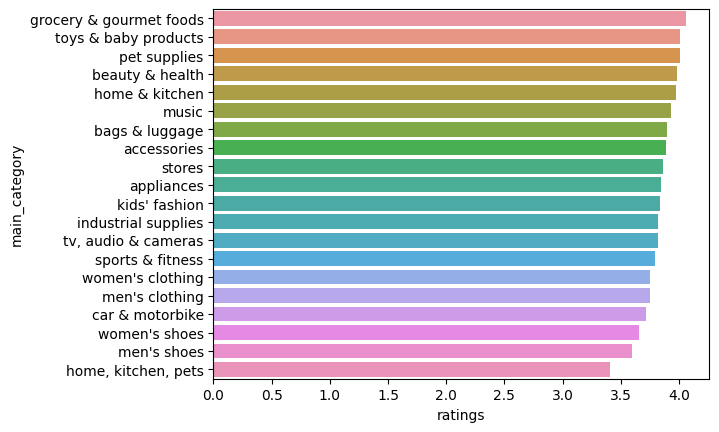

In [51]:
#better to do it by specific product rather than by category

grouped_ratings_by_main_category = df_products.groupby('main_category')['ratings'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=grouped_ratings_by_main_category, y='main_category', x='ratings')
plt.show()

In [81]:
def top_10_rated_products_by_main_category(df_products: pd.DataFrame, category_name: str, min_number_of_ratings: int = 100, top_k: int = 10):
    df_sampled = df_products[(df_products['main_category'] == category_name) & (df_products['no_of_ratings'] > min_number_of_ratings)].sort_values(by='ratings', ascending=False)[:top_k]

    # sns.barplot(df_sampled,  y='name', x='ratings',)
    return df_sampled[['name', 'ratings']]

def min_10_rated_products_by_main_category(df_products: pd.DataFrame, category_name: str, min_number_of_ratings: int = 100, top_k: int = 10):
    df_sampled = df_products[(df_products['main_category'] == category_name) & (df_products['no_of_ratings'] > min_number_of_ratings)].sort_values(by='ratings', ascending=True)[:top_k]

    # sns.barplot(df_sampled,  y='name', x='ratings',)
    return df_sampled[['name', 'ratings']]

In [82]:
top_10_rated_products_by_main_category(df_products, 'accessories')

,name,ratings
204529,"Pinsanity Vampire Pin Up Boy Enamel Lapel Pin,...",4.9
30072,PYXBE Umbrella Umbrella for Women | Umbrella f...,4.9
31431,RYLAN Travel Storage Printed Clothes Packing C...,4.9
29711,Boldfit Shoe Bag for Travel & Storage Travel O...,4.9
31761,"100 Sets Key Ring with Chain and Open Jump,1 i...",4.8
35336,Funny Gifts Best Friend Keychain for Friends B...,4.8
35658,RUSTIC TOWN Leather Pencil Case Holder - Pen P...,4.8
36971,Skip Hop Zoo Pack Giraffe,4.8
146123,MICHAEL Michael Kors Jet Set Item East/West To...,4.8
29810,"Rylan Umbrella Umbrella for Men, Umberallas fo...",4.8


In [83]:
min_10_rated_products_by_main_category(df_products, 'accessories')

,name,ratings
206268,ARTFLY Traditional Gold Plated Couple Pachchi ...,2.3
32155,DRIXTY DRIXTY travel foldable portable lightwe...,2.5
203923,Charms Combo of Gold Plated Bracelet & Chain f...,2.7
199423,meryCraft Designer Fancy Traditional Rakhi for...,2.7
199424,meryCraft Designer Fancy Traditional Rakhi for...,2.7
37267,DN Deals Women Stylish Handbag for office and ...,2.8
311421,NEO VICTORY Digital Baby Boy's Watch (Black Di...,2.8
143216,DN Deals Women Stylish Handbag for office and ...,2.8
198949,MEENAZ Jewellery Valentine Birthday Gifts Styi...,2.8
119064,sunway M3 Silicone LED Digital Black Men's Wom...,2.8


In [98]:
def top_10_products_with_the_highest_discount_by_main_category(df_products: pd.DataFrame, category_name: str, top_k: int = 10):
    df_sampled = df_products[df_products['main_category'] == category_name].sort_values(by='discount', ascending=False)[:top_k]

    return df_sampled[['name', 'discount', 'discount_price', 'actual_price']]

def top_10_products_with_the_lowest_discount_by_main_category(df_products: pd.DataFrame, category_name: str, top_k: int = 10):
    df_sampled = df_products[df_products['main_category'] == category_name].sort_values(by='discount', ascending=True)[:top_k]

    return df_sampled[['name', 'discount', 'discount_price', 'actual_price']]

In [97]:
top_10_products_with_the_highest_discount_by_main_category(df_products, 'accessories')

,name,discount,discount_price,actual_price
45087,Amazon Pay eGift Card,99.900000,10.0,10000.0
29678,"3M 1110 Ear Plugs Corded, Extra Soft, Reusable...",99.000000,16.0,1600.0
33051,Tata Cliq Online E-Gift Card - Flat 5% off - R...,99.000000,100.0,10000.0
30048,Honeywell Polypropylene 304L CORDED EARPLUG (P...,98.982591,90.0,8846.0
151688,I Define You Wallet for Girls and Women's,98.503283,449.0,29999.0
41702,Safety Ear Plugs ANSI Certified Product Corded...,98.131016,299.0,15998.0
202495,SRI RAM GEMS 2.25 Ratti 1.55 Carat Sulemani Ha...,97.474645,249.0,9860.0
203081,SRI RAM GEMS 2.65 Carat Sulemani Hakik Stone C...,97.392670,249.0,9550.0
199320,Loose moissanite stones 6 MM - 9.50 MM White D...,97.376093,1800.0,68600.0
41484,"Honeywell 304L-I CORDED EARPLUG (Orange, Pack ...",97.222222,250.0,9000.0


In [99]:
top_10_products_with_the_lowest_discount_by_main_category(df_products, 'accessories')

,name,discount,discount_price,actual_price
31839,Aristocrat Polyester Hard 66 Cms Luggage- Suit...,0.001771,2823.0,2823.05
41843,SAMSONITE Evoa Polycarbonate 75 cms Brushed Si...,0.004032,24799.0,24800.00
43242,SAMSONITE Evoa Polycarbonate 69 cms Brushed Si...,0.004435,22549.0,22550.00
140568,PC Jeweller The R Alphabet 18KT Yellow Gold an...,0.007692,12999.0,13000.00
151810,Hidesign Women Tote (Black),0.008478,11794.0,11795.00
43391,SAMSONITE Varro Polypropylene 55 cms Peacock B...,0.009009,11099.0,11100.00
150330,Hidesign Women Tote (Red),0.010005,9994.0,9995.00
311973,Fossil Tailor Analog Grey Dial Women's Watch-E...,0.010005,9994.0,9995.00
153163,Hidesign,0.010532,9494.0,9495.00
152434,Hidesign Women Tote (Blue),0.010532,9494.0,9495.00


In [102]:
# which products have high rating with the lowest discount (high rating is a rating > 4.5)
# Idea: we do not want to provide a huge discount for items which are already popular

def best_products_with_high_rating_low_discount(df_products: pd.DataFrame, category_name: str, rating_threshold: float = 4.5,  top_k: int = 10):
    df_sampled = df_products[(df_products['main_category'] == category_name) & (df_products['ratings'] > rating_threshold)].sort_values(by='discount')[:top_k]

    return df_sampled[['name', 'ratings', 'discount']]

best_products_with_high_rating_low_discount(df_products, 'accessories')


,name,ratings,discount
140568,PC Jeweller The R Alphabet 18KT Yellow Gold an...,5.0,0.007692
151810,Hidesign Women Tote (Black),5.0,0.008478
313669,Casio Analog White Dial Girl's Watch-BGA-220G-...,4.7,0.011772
313377,Titan Valentines Analog Rose Gold Dial Women's...,4.8,0.011772
146497,Hidesign Women Tote (Black),4.7,0.012055
45191,Hidesign Women Tote (Black),4.7,0.012055
147125,Hidesign Women's Sling Bag (Brown),4.6,0.014294
36927,Vanguard Camera Backpack |VEO Select 49 BF I 1...,4.6,0.016472
152830,Hidesign Women Sling Bag (Black),5.0,0.019249
150319,Hidesign Women Satchel Handbag (Parrot),5.0,0.020020


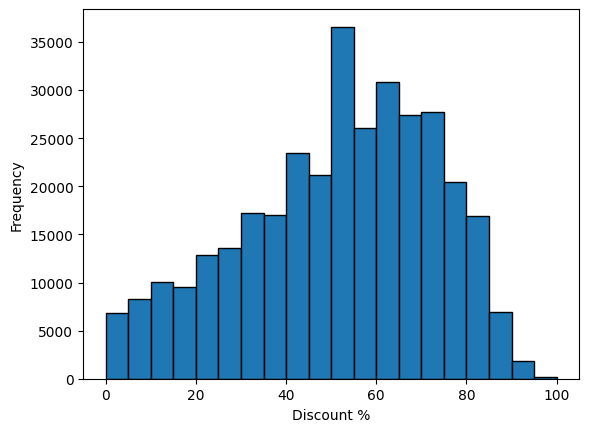

In [109]:
df_products['discount'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Discount %')
plt.show()

In [112]:
# let's imagine every client who made a purchase left a comment and rating. Let's find out how much money do we lose potentially

def potential_revenue_loss(df_products):
    df_copy = df_products.copy()
    df_copy['revenue_loss'] = (df_products['actual_price'] - df_products['discount_price']) * df_products['no_of_ratings']
    
    return df_copy.groupby('main_category')['revenue_loss'].mean()

In [113]:
potential_revenue_loss(df_products)

main_category
accessories                3.042113e+05
appliances                 1.657674e+06
bags & luggage             1.107627e+06
beauty & health            5.480835e+05
car & motorbike            2.702616e+05
grocery & gourmet foods    3.238720e+05
home & kitchen             1.539814e+06
home, kitchen, pets        2.309333e+03
industrial supplies        8.032664e+05
kids' fashion              3.075058e+05
men's clothing             1.022805e+05
men's shoes                2.948293e+05
music                      6.975978e+05
pet supplies               4.633106e+05
sports & fitness           5.279288e+05
stores                     8.195233e+05
toys & baby products       1.770399e+06
tv, audio & cameras        9.910645e+06
women's clothing           2.583465e+05
women's shoes              1.150835e+05
Name: revenue_loss, dtype: float64